### 0.ライブラリ・DataFrameインポート

In [133]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df_user = pd.read_csv(r'/Users/daichi_yamamasu/Documents/因果推論/傾向スコア/psdemo.csv', encoding='utf-8-sig')

In [22]:
df_user = df_user[df_user['S_CLIMATE_RECESSSAFETY'] >= 0]

In [47]:
df_user = df_user[df_user['S_CLIMATE_COMMUNITY'] >= 0]

In [104]:
df_user = df_user[df_user['student_gender'] >= 0]

In [105]:
df_user.head()

,student_id,teacher_id,School_id,district_id,s_treatment,S_CLIMATE_RECESSSAFETY,student_gender,s_grade,S_CLIMATE_COMMUNITY,S_CLIMATE_SCHOOLSAFETY,...,S_LEARNING_RECESSEFFECT,S_LEARNING_SPORTSEFFECT,S_LEARNING_ENGAGEMENT,S_RECESS_ORGANIZED,S_RECESS_ENJOYMENT,S_YOUTHDEV_INTERACTIONS,S_YOUTHDEV_PEERCONFLICT,S_YOUTHDEV_PEERNONCONFLICT,S_PHYSICAL_SELFCONCEPT,PS
0,2273,48376,8117,323,0,2.00,1,5,1.92,2.00,...,2.67,1.00,3.8,0.00,3.71,3.83,1.13,3.25,1.09,0.045787
1,3973,85278,3607,539,1,2.75,0,4,2.77,2.25,...,1.67,2.67,3.5,2.50,3.86,3.83,2.25,2.00,1.82,0.094363
2,5133,42259,2917,425,0,1.75,1,4,3.15,1.50,...,2.00,1.00,3.7,2.33,3.86,3.17,2.00,1.50,1.64,0.159266
3,5443,22956,5740,912,0,3.00,0,4,2.73,3.00,...,2.00,3.33,3.4,0.00,2.57,1.33,1.00,1.00,1.45,0.052122
4,8134,92676,2917,425,0,3.00,0,4,2.92,2.75,...,3.00,2.67,2.7,2.50,4.00,3.67,2.75,2.25,1.73,0.196425


In [7]:
df_time = pd.read_csv(r'/Users/daichi_yamamasu/Documents/analysis/bquxjob_6977cbe1_18ac21adf4b.csv', encoding='utf-8-sig')

In [112]:
df_time.head()

,date,country,region_code,name,province_code,province_name,province_abbreviation,latitude,longitude,location_geom,confirmed_cases,note
0,2020-06-25 17:00:00.000000 UTC,ITA,13,Abruzzo,879,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,NaN,25,NaN
1,2020-06-26 17:00:00.000000 UTC,ITA,13,Abruzzo,879,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,NaN,25,NaN
2,2020-06-27 17:00:00.000000 UTC,ITA,13,Abruzzo,879,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,NaN,25,NaN
3,2020-06-28 17:00:00.000000 UTC,ITA,13,Abruzzo,879,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,NaN,25,NaN
4,2020-06-29 17:00:00.000000 UTC,ITA,13,Abruzzo,879,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,NaN,25,NaN


In [115]:
df_time['date'] = pd.to_datetime(df_time['date'])

In [126]:
df_time_1 = df_time.groupby('date', as_index=False).agg({'country': 'count'})

In [127]:
df_time_1.tail()

,date,country
1300,2023-09-16 17:00:00+00:00,57
1301,2023-09-17 17:00:00+00:00,57
1302,2023-09-18 17:00:00+00:00,57
1303,2023-09-19 17:00:00+00:00,57
1304,2023-09-20 17:00:00+00:00,57


### 1.ヒストグラム

#### 単一の変数のヒストグラム

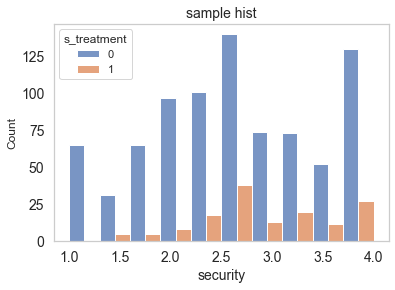

In [142]:
#plt.xlim(5, 55)                           #x軸の表示範囲
#plt.ylim(0, 30)                           #y軸の表示範囲
plt.title("sample hist", fontsize=14)      #グラフのタイトル
plt.xlabel("security", fontsize=14)        #x軸ラベル名
#plt.ylabel("Frequency", fontsize=20)      #y軸ラベル名
plt.grid(False)                            #目盛線の表示
plt.tick_params(labelsize = 14)            #目盛線のラベルサイズ 
sns.histplot(
    x='S_CLIMATE_RECESSSAFETY',            #変数
    bins=10,                               #階級
    hue='s_treatment',                     #ラベル変数
    multiple='dodge',                      #ラベルごとのデータを横に並べる
    data=df_user
)
plt.show()

#### ヒストグラムを重ねる

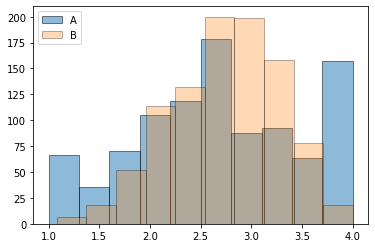

In [83]:
plt.hist(
    'S_CLIMATE_RECESSSAFETY',
    alpha=0.5,                           #データの透明度
    ec='black',
    data=df_user
)
plt.hist(
    'S_CLIMATE_COMMUNITY',
    alpha=0.3,                           #データの透明度
    ec='black',
    data=df_user
)
plt.legend(["A", "B"],                   #凡例名
           loc="upper left",             #凡例位置
           fontsize=10                   #文字サイズ
)
plt.show()

#### まとめてヒストグラム化する

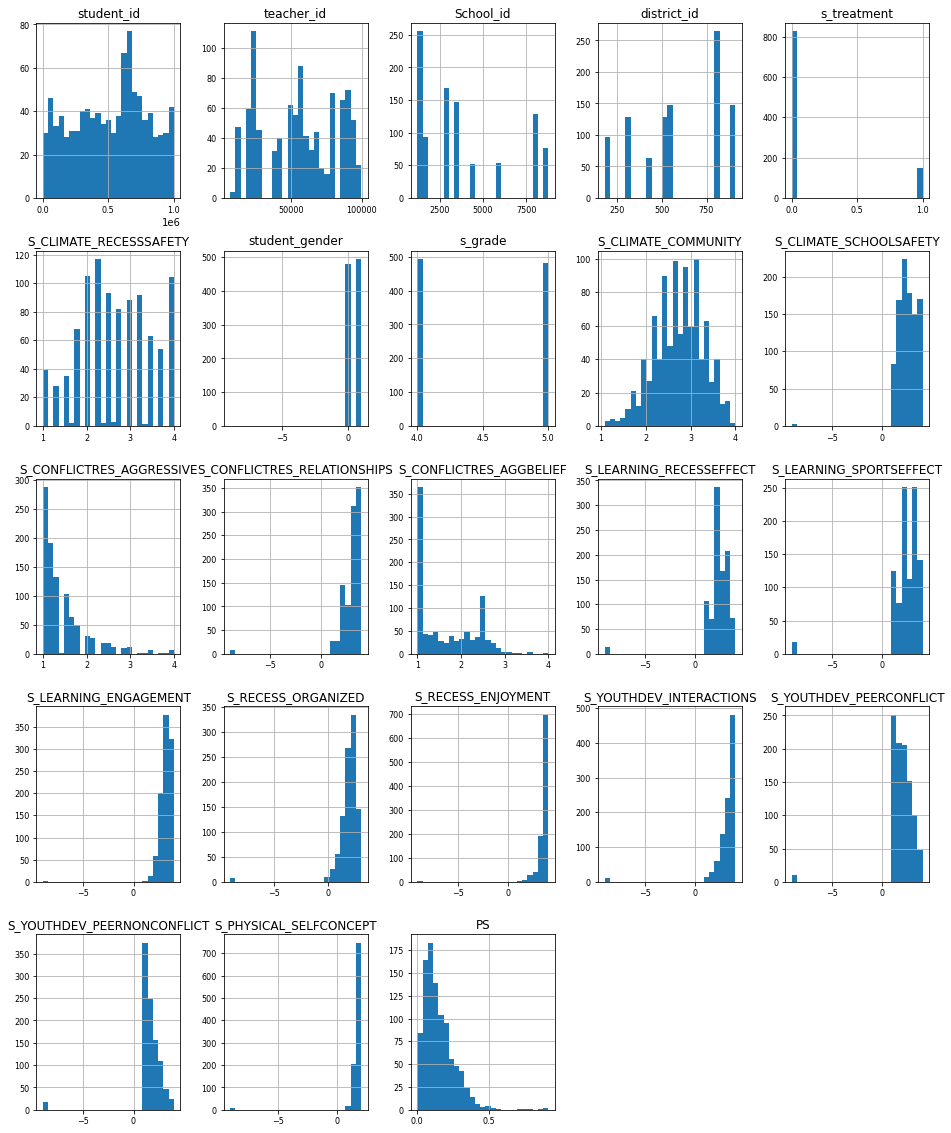

In [74]:
df_user.hist(figsize=(16, 20),
             bins=25,
             xlabelsize=8,
             ylabelsize=8
)
plt.show()

### 2.箱ヒゲ図

#### 変数ごとの箱ヒゲ図

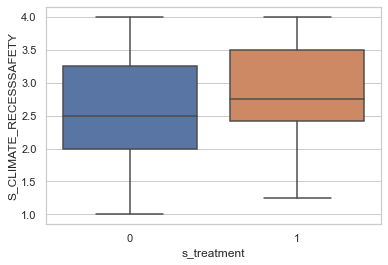

In [85]:
sns.set()
sns.set_style('whitegrid')
sns.boxplot(
    y='S_CLIMATE_RECESSSAFETY',        #y軸
    x='s_treatment',                   #x軸
    data=df_user
)
plt.show()

#### データの値を可視化する

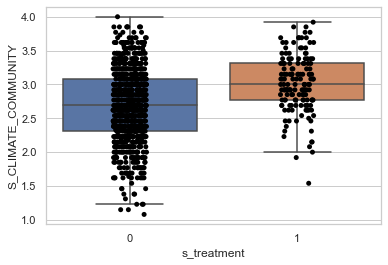

In [88]:
sns.set()
sns.set_style('whitegrid')
sns.boxplot(
    y='S_CLIMATE_COMMUNITY',
    x='s_treatment',
    showfliers=False,
    data=df_user
)
sns.stripplot(
    y='S_CLIMATE_COMMUNITY',
    x='s_treatment',
    jitter=True,
    color='black',
    data=df_user
)
plt.show()

### 3.クロス集計

#### 単一の変数を単一の集計形式で集計

In [94]:
df_user.groupby('s_treatment', as_index=False).agg({'student_gender': 'count'})

,s_treatment,student_gender
0,0,829
1,1,147


#### 全ての変数に対して複数の集計形式で集計

In [97]:
df_user.groupby('s_treatment', as_index=False).agg(['count', 'sum'])

student_id            teacher_id           School_id           \
                 count        sum      count       sum     count      sum   
s_treatment                                                                 
0                  829  430645697        829  46296597       829  3230485   
1                  147   71404704        147   7846533       147   530229   

            district_id         S_CLIMATE_RECESSSAFETY           ...  \
                  count     sum                  count      sum  ...   
s_treatment                                                      ...   
0                   829  505216                    829  2172.43  ...   
1                   147   79233                    147   425.66  ...   

            S_YOUTHDEV_INTERACTIONS          S_YOUTHDEV_PEERCONFLICT           \
                              count      sum                   count      sum   
s_treatment                                                                     
0                               829  2560.17                     829  1575.50   
1                               147   487.99                     147   326.31   

            S_YOUTHDEV_PEERNONCONFLICT          S_PHYSICAL_SELFCONCEPT  \
                                 count      sum                  count   
s_treatment                                                              
0                                  829  1230.75                    829   
1                                  147   271.00                    147   

                        PS              
                 sum count         sum  
s_treatment                             
0            1372.54   829  113.251941  
1             254.34   147   33.246415  

[2 rows x 44 columns]

#### 集計値を更に計算させる

In [99]:
df_user.groupby('s_treatment', as_index=False).agg(lambda x: max(x) + min(x))

,s_treatment,student_id,teacher_id,School_id,district_id,S_CLIMATE_RECESSSAFETY,student_gender,s_grade,S_CLIMATE_COMMUNITY,S_CLIMATE_SCHOOLSAFETY,...,S_LEARNING_RECESSEFFECT,S_LEARNING_SPORTSEFFECT,S_LEARNING_ENGAGEMENT,S_RECESS_ORGANIZED,S_RECESS_ENJOYMENT,S_YOUTHDEV_INTERACTIONS,S_YOUTHDEV_PEERCONFLICT,S_YOUTHDEV_PEERNONCONFLICT,S_PHYSICAL_SELFCONCEPT,PS
0,0,1001207,105914,9966,1091,5.00,-8,9,5.08,-5.0,...,-5.0,-5.0,-5.0,-6.0,-5.0,-5.0,-5.00,-5.0,-7.0,0.767730
1,1,1003847,113552,7214,1078,5.25,1,9,5.46,-5.0,...,5.0,-5.0,5.9,3.0,6.0,5.0,4.88,5.0,3.0,0.936914


#### 集計値をグラフ化させる

<AxesSubplot:xlabel='s_treatment', ylabel='student_gender'>

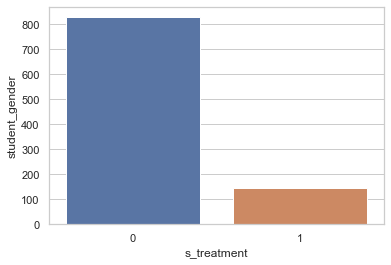

In [100]:
agg_df = df_user.groupby('s_treatment', as_index=False).agg({'student_gender': 'count'})
sns.barplot(x = 's_treatment', y = 'student_gender', data = agg_df)

#### 2つのカテゴリ変数でデータを集計したい場合

In [110]:
pd.pivot_table(df_user,                          #元のDataFrame
               index='s_treatment',              #インデックス
               columns='student_gender',         #カラム
               values='S_CLIMATE_COMMUNITY',     #集計対象のカラム
               margins=True,                     #小計を表示させるか
               aggfunc=np.mean                   #小計の集計形式
)

student_gender,0,1,All
s_treatment,,,
0,2.712641,2.663270,2.687657
1,3.002113,3.023289,3.013061
All,2.755458,2.718545,2.736718


### 4.時系列

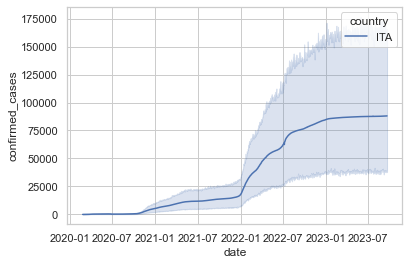

In [135]:
sns.set()
sns.set_context("paper")                                              #グラフの文字サイズ
sns.set_theme(style="whitegrid")                                      #グリッドのスタイル
sns.lineplot(x='date',                                                #x軸
             y='confirmed_cases',                                     #y軸
             hue='country',                                           #
             data=df_time
)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.show()